Any time series data that has to be modeled needs to be stationary. Stationary means that it’s statistical properties are more or less constant with time. 

These are the following properties that any stationarity model will have:

1. Constant Mean
2. Constant Variance(There can be variations, but the variations shouldn’t be irregular)
3. No seasonality(No repeating patterns in the data set)

In [1]:
import pandas as pd
df=pd.read_csv(r"D:\python\my projects\store data prediction\Data_Store.csv",index_col='DATE'   ,parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df

Shape of data (1821, 5)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758
...,...,...,...,...,...
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753


<AxesSubplot:xlabel='DATE'>

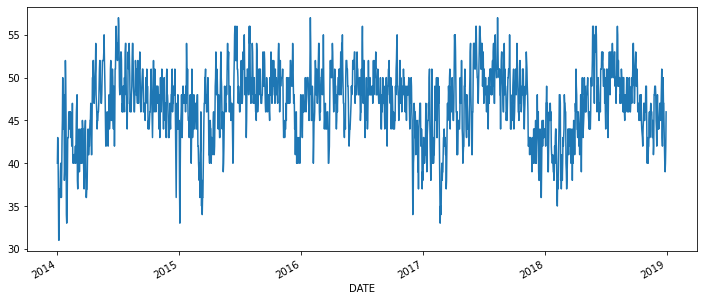

In [2]:
df['AvgTemp'].plot(figsize=(12,5))

# Checking For Stationarity

In [3]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(df['AvgTemp'])

1. ADF :  -6.554680125068778
2. P-Value :  8.675937480199557e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


**If p< 0.05 ; Data is stationary**

**if p>0.05; Data is not stationary**

It’s not a hard and fast rule, but a stationary data should have a small p value. Larger p value could indicate presence of certain trends(varying mean) or seasonality as well.

**Auto ARIMA function tries to find optimal p,d,q combination for a data using minimal AIC condition**

In [4]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['AvgTemp'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.740, Time=1.77 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=1.29 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=1.68 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.143, Time=2.26 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.644, Time=2.28 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.193, Time=2.01 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8309.880, Time=2.61 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.195, Time=2.65 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.630, Time=2.92 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8305.968, Time=2.64 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

In [5]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(1821, 5)
(1791, 5) (30, 5)


In [6]:
test

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-01,36.0,52.0,44.0,640,1743
2018-12-02,33.0,51.0,42.0,641,1743
2018-12-03,36.0,53.0,45.0,641,1743
2018-12-04,39.0,56.0,48.0,642,1743
2018-12-05,36.0,53.0,45.0,643,1743
2018-12-06,36.0,52.0,44.0,643,1743
2018-12-07,37.0,53.0,45.0,644,1744
2018-12-08,34.0,53.0,44.0,645,1744
2018-12-09,36.0,53.0,45.0,645,1744


In [7]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                     ARMA(1, 5)   Log Likelihood               -4070.198
Method:                       css-mle   S.D. of innovations              2.347
Date:                Sun, 17 Oct 2021   AIC                           8156.395
Time:                        10:54:32   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            46.5857      0.785     59.355      0.000      45.047      48.124
ar.L1.AvgTemp     0.9856      0.007    150.631      0.000       0.973       0.998
ma.L1.AvgTemp    -0.1412      0.025     -5.735      0.000      -0.190      -0.093
ma.L2.AvgTemp    -0.2268      0.024     -9.295      0.000      -0.275      -0.179
ma.L3.AvgTemp    -0.2168      0.026     -8.416      0.000      -0.267      -0.166
ma.L4.AvgTemp    -0.1479      0.023     -6.300      0.000      -0.194      -0.102
ma.L5.AvgTemp    -0.0595      0.025     -2.411      0.016      -0.108      -0.011
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0146           +0.0000j            1.0146            0.0000
MA.1            1.0883           -0.0000j            1.0883           -0.0000
MA.2            0.0555           -1.8423j            1.8431           -0.2452
MA.3            0.0555           +1.8423j            1.8431            0.2452
MA.4           -1.8432           -1.0734j            2.1330           -0.4161
MA.5           -1.8432           +1.0734j            2.1330            0.4161
-----------------------------------------------------------------------------
"""

In [20]:
start=len(train)
#end=len(train)+len(test)-1
pred=model.predict(start=start,end=1791+30,typ='levels').rename('ARIMA Predictions')

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [9]:
test.
columns

Index(['MinTemp', 'MaxTemp', 'AvgTemp', 'Sunrise', 'Sunset'], dtype='object')

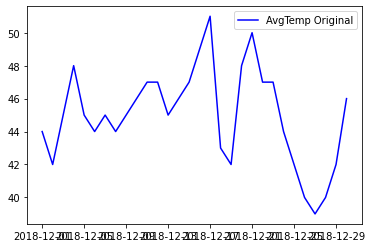

In [21]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(10, 8))
plt.plot(test['AvgTemp'], 'b-', label = 'AvgTemp Original')

#plt.xlabel('Date'); plt.ylabel('Market Cap (Billions $)'); plt.title('Market Cap of GM and Tesla')
plt.legend();

In [18]:
test.shape

(30, 5)

In [19]:
len(train)

1791

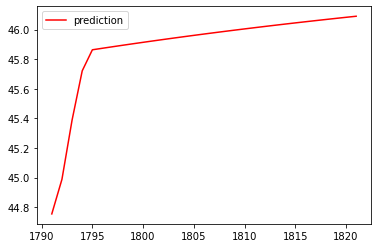

In [22]:
plt.plot(pred, 'r-', label = 'prediction')
plt.legend();

In [14]:
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
test['AvgTemp'].mean()
mape=sqrt(mean_absolute_percentage_error(pred,test['AvgTemp']))
print(mape)

0.22453408948848008
